# import packages

In [2]:
# -*- coding: utf-8 -*-

import datetime as dt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.special import beta
from scipy.optimize import minimize
from scipy.stats import skewnorm
from pandas_datareader import data, wb


# functions to get stock return data

In [3]:
def get_stock_rtn(start_date,end_date,ticker):
    '''
    ticker: 'SPY'
    start_date: dt.datetime(2011,1,4) 
    end_date: dt.datetime(2017,5,1)
    '''
    price_df = data.DataReader(ticker,'google',start=start_date,end=end_date)['Close']
    rtndf = pd.DataFrame(price_df.pct_change().dropna())
    rtndf.columns = ['return']
    return rtndf





# portfolio data

In [4]:
# portfolio securities:

ticker = 'ibm'
start_date = dt.datetime(2016,1,1) 
end_date = dt.datetime(2016,12,31)
ibmdf = get_stock_rtn(start_date,end_date,ticker)


# hedge securities:

ticker = 'spy'
spydf = get_stock_rtn(start_date,end_date,ticker)




# return - min var hedge ratio

In [5]:
from scipy.optimize import minimize
def min_var(c):
    return np.var((ibmdf + c*spydf)['return'])
min_var(-1)

9.6092785615299473e-05

# min var = 0.000096

In [6]:
res = minimize(min_var, 1,
                method='nelder-mead', options={'xtol':1e-8,'disp': True})

Optimization terminated successfully.
         Current function value: 0.000096
         Iterations: 33
         Function evaluations: 67


# hedge ratio = -0.92992296

In [7]:
res.x

array([-0.92992296])

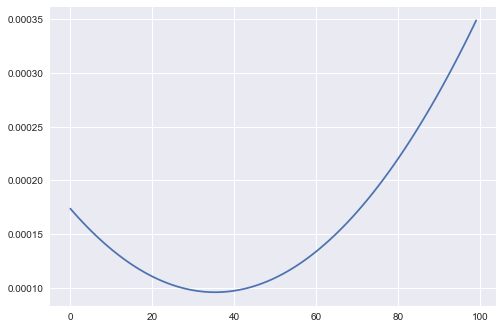

In [8]:
plt.plot([min_var(i) for i in np.linspace(-2,1,100) ])


# s-s0  difference

In [9]:

start_date = dt.datetime(2016,1,1) 
end_date = dt.datetime(2016,12,31)


ibmp = pd.DataFrame(data.DataReader('ibm','google',start=start_date,end=end_date)['Close'])
ibmpc = (ibmp-ibmp.shift(1)).dropna()


spyp = pd.DataFrame(data.DataReader('spy','google',start=start_date,end=end_date)['Close'])
spypc = (spyp-spyp.shift(1)).dropna()


# VAR    (minimize or maxmize?)



In [18]:
from scipy.stats import norm
from scipy.optimize import minimize

alpha=0.01

def min_VAR(c):
    return norm.ppf(1-alpha)* np.std(ibmdf + c*spydf)-np.mean(ibmdf + c*spydf)
res = minimize(min_VAR, 1,  method='SLSQP', options={'disp': True})
res.x

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0223100430108
            Iterations: 7
            Function evaluations: 21
            Gradient evaluations: 7


array([-0.904417])

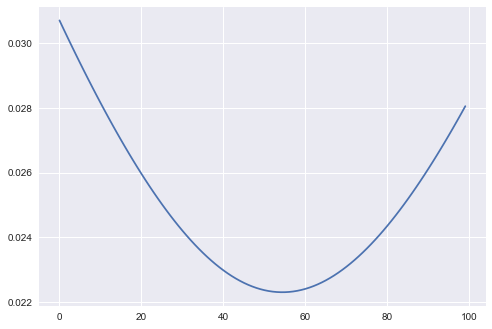

In [19]:
plt.plot([min_VAR(i) for i in np.linspace(-2,0,100) ])


# CVAR

In [12]:
from scipy.stats import norm
from scipy.optimize import minimize

alpha=0.01
def min_CVAR(c):  
    return  alpha**-1*norm.pdf(norm.ppf(alpha))*np.std(ibmdf + c*spydf)-np.mean(ibmdf + c*spydf)
res = minimize(min_VAR, 1,  method='SLSQP', options={'disp': True})
res.x


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0223100430108
            Iterations: 7
            Function evaluations: 21
            Gradient evaluations: 7


array([-0.904417])

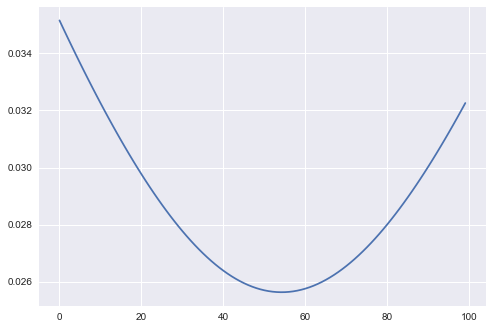

In [13]:
plt.plot([min_CVAR(i) for i in np.linspace(-2,0,100) ])
